In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bluebook-for-bulldozers/Machine_Appendix.csv
/kaggle/input/bluebook-for-bulldozers/Data Dictionary.xlsx
/kaggle/input/bluebook-for-bulldozers/median_benchmark.csv
/kaggle/input/bluebook-for-bulldozers/random_forest_benchmark_test.csv
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv
/kaggle/input/bluebook-for-bulldozers/ValidSolution.csv
/kaggle/input/bluebook-for-bulldozers/Test.csv
/kaggle/input/bluebook-for-bulldozers/Valid.csv
/kaggle/input/bluebook-for-bulldozers/trainandvalid/TrainAndValid.csv
/kaggle/input/bluebook-for-bulldozers/train/Train.csv
/kaggle/input/bluebook-for-bulldozers/valid/Valid.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("/kaggle/input/bluebook-for-bulldozers/trainandvalid/TrainAndValid.csv")
test = pd.read_csv("/kaggle/input/bluebook-for-bulldozers/Test.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null object
saledate                    412698 non-null object
fiModelDesc                 412698 non-null object
fiBaseModel                 412698 non-null object
fiSecondaryDesc             271971 non-null object
fiModelSeries               58667 non-null object
fiModelDescriptor           74816 non-null object
ProductSize                 196093 non-null object
fiProductClassDesc          412698 non-null object
state                      

# Missing features in the Training Dataset #

,Total,Percent
Tip_Control,386715,0.937041
Blade_Extension,386715,0.937041
Blade_Width,386715,0.937041
Enclosure_Type,386715,0.937041
Engine_Horsepower,386715,0.937041


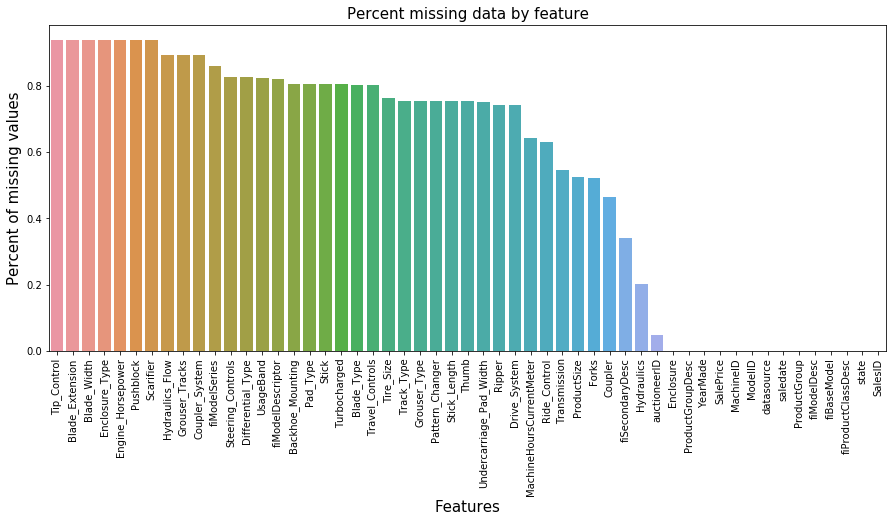

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [8]:
df['YearMade'].unique()

array([2004, 1996, 2001, 2007, 1993, 2008, 1000, 1998, 1999, 2003, 1991,
       2000, 2005, 1995, 2006, 2002, 1984, 1988, 1980, 1992, 1987, 1997,
       1971, 1978, 1989, 1985, 1979, 1976, 1994, 1982, 1990, 1974, 1968,
       1966, 1983, 1986, 1981, 1970, 1977, 1975, 1973, 1965, 1967, 2009,
       2010, 1969, 1972, 1964, 1957, 1958, 1963, 1919, 1920, 1950, 1948,
       1952, 1942, 1956, 1954, 1953, 1955, 1959, 1960, 1961, 1962, 1951,
       1937, 1949, 1947, 2012, 2013, 2011, 2014])

In [9]:
df['datasource'].unique()

array([121, 132, 136, 149, 172, 173])

In [10]:
df['SalePrice'] = np.log(df['SalePrice'])

# Define the Regressors 

In [11]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

In [12]:
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor()

In [13]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()

In [14]:
from sklearn.neighbors import KNeighborsRegressor

k_neighbors_regressor = KNeighborsRegressor()

Let's define features and the target 

In [15]:
features1 = ['YearMade', 'datasource'] 
y = ['SalePrice']

X1 = df[features1]
y = df[y]

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder = LabelEncoder()

df['state'] = encoder.fit_transform(df.state)
df['fiBaseModel'] = encoder.fit_transform(df.fiBaseModel)
df['fiProductClassDesc'] = encoder.fit_transform(df.state)
df['fiModelDesc'] = encoder.fit_transform(df.fiBaseModel)

In [18]:
features2 = ['YearMade', 'datasource', 'state', 'fiBaseModel']

X2 = df[features2]

In [19]:
features3 = ['YearMade', 'datasource', 'state', 'fiBaseModel', 'fiProductClassDesc' , 'fiModelDesc']

X3 = df[features3]

## Let's split the data into training and cross-validation set

In [20]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y, test_size=0.3)

In [21]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y, test_size=0.3)

In [22]:
X_train3, X_val3, y_train3, y_val3 = train_test_split(X3, y, test_size=0.3)

## Train the model

1. Train the model with features YearMade and datasource 

> 1. Linear Regressor

In [23]:
linear_regressor.fit(X_train1, y_train1)

pred_y_val1 = linear_regressor.predict(X_val1)

In [24]:
score_lr_1 = np.sqrt(mean_squared_error(pred_y_val1, y_val1))
score_lr_1

0.6842997010124039

> 2. XGB Regressor 

In [25]:
xgb_regressor.fit(X_train1, y_train1)

pred_y_val1 = xgb_regressor.predict(X_val1)

[15:06:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [26]:
score_xgb_1 = np.sqrt(mean_squared_error(pred_y_val1, y_val1))
score_xgb_1

0.6635354657880881

> 3. Random Forest Regressor

In [27]:
random_forest_regressor.fit(X_train1, y_train1)

pred_y_val1 = random_forest_regressor.predict(X_val1)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [28]:
score_rf_1 = np.sqrt(mean_squared_error(pred_y_val1, y_val1))
score_rf_1

0.6633277871323636

> 4. KNeighbors Regressor

In [29]:
k_neighbors_regressor.fit(X_train1, y_train1)

pred_y_val1 = k_neighbors_regressor.predict(X_val1)

In [30]:
score_kn_1 = np.sqrt(mean_squared_error(pred_y_val1, y_val1))
score_kn_1

0.7453296409878629

****Summary of the trained models

In [31]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'XGB Regressor', 'Random Forest Regressior', 'KNeighbors Regressor'],
    'Score': [score_lr_1, score_xgb_1, score_rf_1, score_kn_1 ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,KNeighbors Regressor,0.745330
0,Linear Regression,0.684300
1,XGB Regressor,0.663535
2,Random Forest Regressior,0.663328


2. Train the model with features YearMade, datasource, state and fiBaseModel

> 1. Linear Regressor 

In [32]:
linear_regressor.fit(X_train2, y_train2)

pred_y_val2 = linear_regressor.predict(X_val2)

In [33]:
score_lr_2 = np.sqrt(mean_squared_error(pred_y_val2, y_val2))
score_lr_2

0.6828963152946764

> 2. XBG Regressor

In [34]:
xgb_regressor.fit(X_train2, y_train2)

pred_y_val2 = xgb_regressor.predict(X_val2)

[15:07:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [35]:
score_xgb_2 = np.sqrt(mean_squared_error(pred_y_val2, y_val2))
score_xgb_2

0.48490661419674524

> 3. Random Forest Regressor

In [36]:
random_forest_regressor.fit(X_train2, y_train2)

pred_y_val2 = random_forest_regressor.predict(X_val2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [37]:
score_rf_2 = np.sqrt(mean_squared_error(pred_y_val2, y_val2))
score_rf_2

0.3331015470667217

4. KNeighbors Regressor

In [38]:
k_neighbors_regressor2 = KNeighborsRegressor()

k_neighbors_regressor2.fit(X_train2, y_train2)

pred_y_val2 = k_neighbors_regressor2.predict(X_val2)

In [39]:
score_kn_2 = np.sqrt(mean_squared_error(pred_y_val2, y_val2))
score_kn_2

0.3800248261315917

****Summary of the trained models

In [40]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'XGB Regressor', 'Random Forest Regressior', 'KNeighbors Regressor'],
    'Score': [score_lr_2, score_xgb_2, score_rf_2, score_kn_2 ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Linear Regression,0.682896
1,XGB Regressor,0.484907
3,KNeighbors Regressor,0.380025
2,Random Forest Regressior,0.333102


1. Train the model with features YearMade, datasource, state ,fiBaseModel, fiProductClassDesc and fiModelDesc 

> 1. Linear Regressor

In [41]:
linear_regressor.fit(X_train3, y_train3)

pred_y_val3 = linear_regressor.predict(X_val3)

In [42]:
score_lr_3 = np.sqrt(mean_squared_error(pred_y_val3, y_val3))
score_lr_3

0.6833556274395328

> 2. XGB Regressor

In [43]:
xgb_regressor.fit(X_train3, y_train3)

pred_y_val3 = xgb_regressor.predict(X_val3)

[15:07:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [44]:
score_xgb_3 = np.sqrt(mean_squared_error(pred_y_val3, y_val3))
score_xgb_3

0.4860760941717246

> 3. Random Forest Regressor

In [45]:
random_forest_regressor.fit(X_train3, y_train3)

pred_y_val3 = random_forest_regressor.predict(X_val3)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [46]:
score_rf_3 = np.sqrt(mean_squared_error(pred_y_val3, y_val3))
score_rf_3

0.3330938125203163

> 4. KNeighbors Regressor 

In [47]:
k_neighbors_regressor3 = KNeighborsRegressor()

k_neighbors_regressor3.fit(X_train3, y_train3)

pred_y_val3 = k_neighbors_regressor3.predict(X_val3)

In [48]:
score_kn_3 = np.sqrt(mean_squared_error(pred_y_val3, y_val3))
score_kn_3

0.3778065839886499

**Summary of the Trained Models**

In [49]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'XGB Regressor', 'Random Forest Regressior', 'KNeighbors Regressor'],
    'Score': [score_lr_3, score_xgb_3, score_rf_3, score_kn_3 ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Linear Regression,0.683356
1,XGB Regressor,0.486076
3,KNeighbors Regressor,0.377807
2,Random Forest Regressior,0.333094


#### Let's move to the test dataset

In [50]:
test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,5/3/2012 0:00,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,5/10/2012 0:00,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,5/10/2012 0:00,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,5/10/2012 0:00,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,5/10/2012 0:00,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [51]:
test['fiModelDesc'].unique()

array(['580G', '936', 'EC210BLC', ..., '840-2', '55J', '55N2'],
      dtype=object)

In [52]:
test['fiProductClassDesc'].unique()

array(['Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
       'Wheel Loader - 135.0 to 150.0 Horsepower',
       'Hydraulic Excavator, Track - 21.0 to 24.0 Metric Tons',
       'Hydraulic Excavator, Track - 33.0 to 40.0 Metric Tons',
       'Track Type Tractor, Dozer - 20.0 to 75.0 Horsepower',
       'Wheel Loader - 100.0 to 110.0 Horsepower',
       'Track Type Tractor, Dozer - 85.0 to 105.0 Horsepower',
       'Hydraulic Excavator, Track - 8.0 to 11.0 Metric Tons',
       'Wheel Loader - 120.0 to 135.0 Horsepower',
       'Track Type Tractor, Dozer - 190.0 to 260.0 Horsepower',
       'Hydraulic Excavator, Track - 40.0 to 50.0 Metric Tons',
       'Wheel Loader - 175.0 to 200.0 Horsepower',
       'Wheel Loader - 250.0 to 275.0 Horsepower',
       'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
       'Wheel Loader - 150.0 to 175.0 Horsepower',
       'Motorgrader - 130.0 to 145.0 Horsepower',
       'Hydraulic Excavator, Track - 0.0 to 2.0 Metric Tons',
       'Sk

In [53]:
test['fiBaseModel'].unique()

array(['580', '936', 'EC210', '330', '650', 'WB146', 'WB140', '544',
       'PC228', 'PC88', 'WA250', 'WA320', '214', 'D65', 'PC300', 'PC400',
       'WA380', 'WA450', 'TB135', '12', '8018', 'S185', '416', '120',
       'S130', 'SK160', '550', '450', 'CX160', '314', '624', 'G80', '311',
       'L90', '570', 'D8', 'D6', '322', '420', '7775', 'L783', '315',
       '962', '80', '65', '770', 'WA800', 'D475', '865', 'S175', '928',
       '938', '644', '190', 'EX700', 'EX450', 'L150', 'LB75', '1840',
       '621', '312', 'TX760', 'D21', '328', '972', '435', 'T190', '307',
       'TB145', '924', 'CTL60', '4840', '6640', '2042', 'PC120', '750',
       '710', 'PC75', 'S300', '555', '988', 'SE280', '325', '310', 'D5',
       '302.5', '303', '140', '130', 'PC220', 'L180', '303.5', '262',
       '236', '980', 'L120', '953', 'MX502', '773', 'T250', 'PC240',
       'D37', '321', 'S220', 'D7', 'LW170', 'LB90', 'D3', '320', '95',
       '721', '210', '410', '226', '375', 'ZX225', 'ZX270', 'EC240',
   

In [54]:
test['state'].unique()

array(['Wyoming', 'Virginia', 'New Jersey', 'Florida', 'South Carolina',
       'Illinois', 'Alabama', 'Texas', 'Louisiana', 'Arizona', 'Kentucky',
       'Washington', 'Oklahoma', 'Mississippi', 'Indiana',
       'North Carolina', 'Arkansas', 'Ohio', 'California', 'Colorado',
       'Missouri', 'Tennessee', 'Georgia', 'West Virginia', 'Maine',
       'Massachusetts', 'New Mexico', 'Pennsylvania', 'New York', 'Iowa',
       'Kansas', 'Nevada', 'Hawaii', 'Oregon', 'Minnesota', 'Maryland',
       'Utah', 'Idaho', 'Michigan', 'South Dakota', 'Wisconsin', 'Alaska',
       'Washington DC', 'Nebraska', 'Montana', 'North Dakota',
       'New Hampshire', 'Connecticut', 'Vermont', 'Puerto Rico',
       'Rhode Island'], dtype=object)

In [55]:
test['fiModelDesc'] = encoder.fit_transform(test.fiModelDesc)
test['fiProductClassDesc'] = encoder.fit_transform(test.fiProductClassDesc)
test['fiBaseModel'] = encoder.fit_transform(test.fiBaseModel)
test['state'] = encoder.fit_transform(test.state)

In [56]:
features = ['datasource', 'YearMade', 'state' ,'fiBaseModel', 'fiProductClassDesc', 'fiModelDesc']

X = test[features]

In [57]:
pred = k_neighbors_regressor3.predict(X)
#pred = np.exp(pred)

In [58]:
pred.shape

(12457, 1)

In [59]:
pred1 = np.reshape(pred, (12457,))

In [60]:
pred1.shape

(12457,)

In [61]:
submission = pd.DataFrame({
        "Id": test["SalesID"],
        "SalePrice": np.exp(pred1)
    })

submission.to_csv('submission.csv', index=False)

In [62]:
submission = pd.read_csv('submission.csv')
submission.head()

,Id,SalePrice
0,1227829,13781.761269
1,1227844,13146.561586
2,1227847,18050.945369
3,1227848,15638.883368
4,1227863,13531.146907
